In [1]:
import itertools
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

def read_data(data_path):
    data = pd.read_json(data_path)
    return data

df_0=read_data('sample_6k.json')
df=read_data('sample_6k_quasi_extract.json')

In [2]:
df_0.head(5)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1238, 'avlength': 12.0201938611...","{'size': 180224, 'vsize': 180224, 'has_debug':...","{'coff': {'timestamp': 892092777, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 11166, 'avlength': 5.807898979,...","{'size': 2377730, 'vsize': 77824, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Wr...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 5547, 'avlength': 6.0434469082,...","{'size': 1153808, 'vsize': 1167360, 'has_debug...","{'coff': {'timestamp': 938258311, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegCloseKey', 'AllocateAndI...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [4]:
df.columns 

Index(['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram',
       'byteentropy', 'strings', 'general', 'header',
       ...
       'imports_LIBAFPCOMM32.DLL', 'imports_CORE_RL_MAGICKWAND_.DLL',
       'imports_IASSVCS.DLL', 'imports_RTUTILS.DLL', 'imports_NNOTES.DLL',
       'imports_DHCPCSVC.DLL', 'imports_D3D12.DLL',
       'imports_API-MS-WIN-DX-D3DKMT-L1-1-1.DLL',
       'imports_API-MS-WIN-GDI-INTERNAL-UAP-L1-1-0.DLL',
       'imports_QBSENDERROR20.DLL'],
      dtype='object', length=1742)

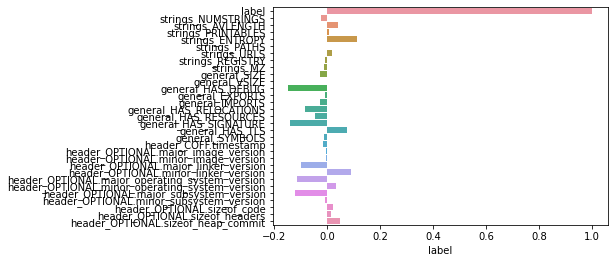

In [2]:
#corelation matrix base
corr_matrix=df.corr()
row=corr_matrix['label']
ax = sns.barplot(y=row.index,x=row)
plt.show()

In [3]:
partial=df_0[['label','histogram']]
partial.sort_values(by=['label'])
data = np.array(partial['histogram'])
data=np.stack(data, axis=1)
data=normalize(data)
data_0=data[:,0:2749] #part with label 0
data_1=data[:,2749:4681] #part with label 1
#some test stuff
print(partial['label'].value_counts())
print(partial['label'][1])
print(partial['label'][2751])

 0    2750
 1    1932
-1    1318
Name: label, dtype: int64
0
1


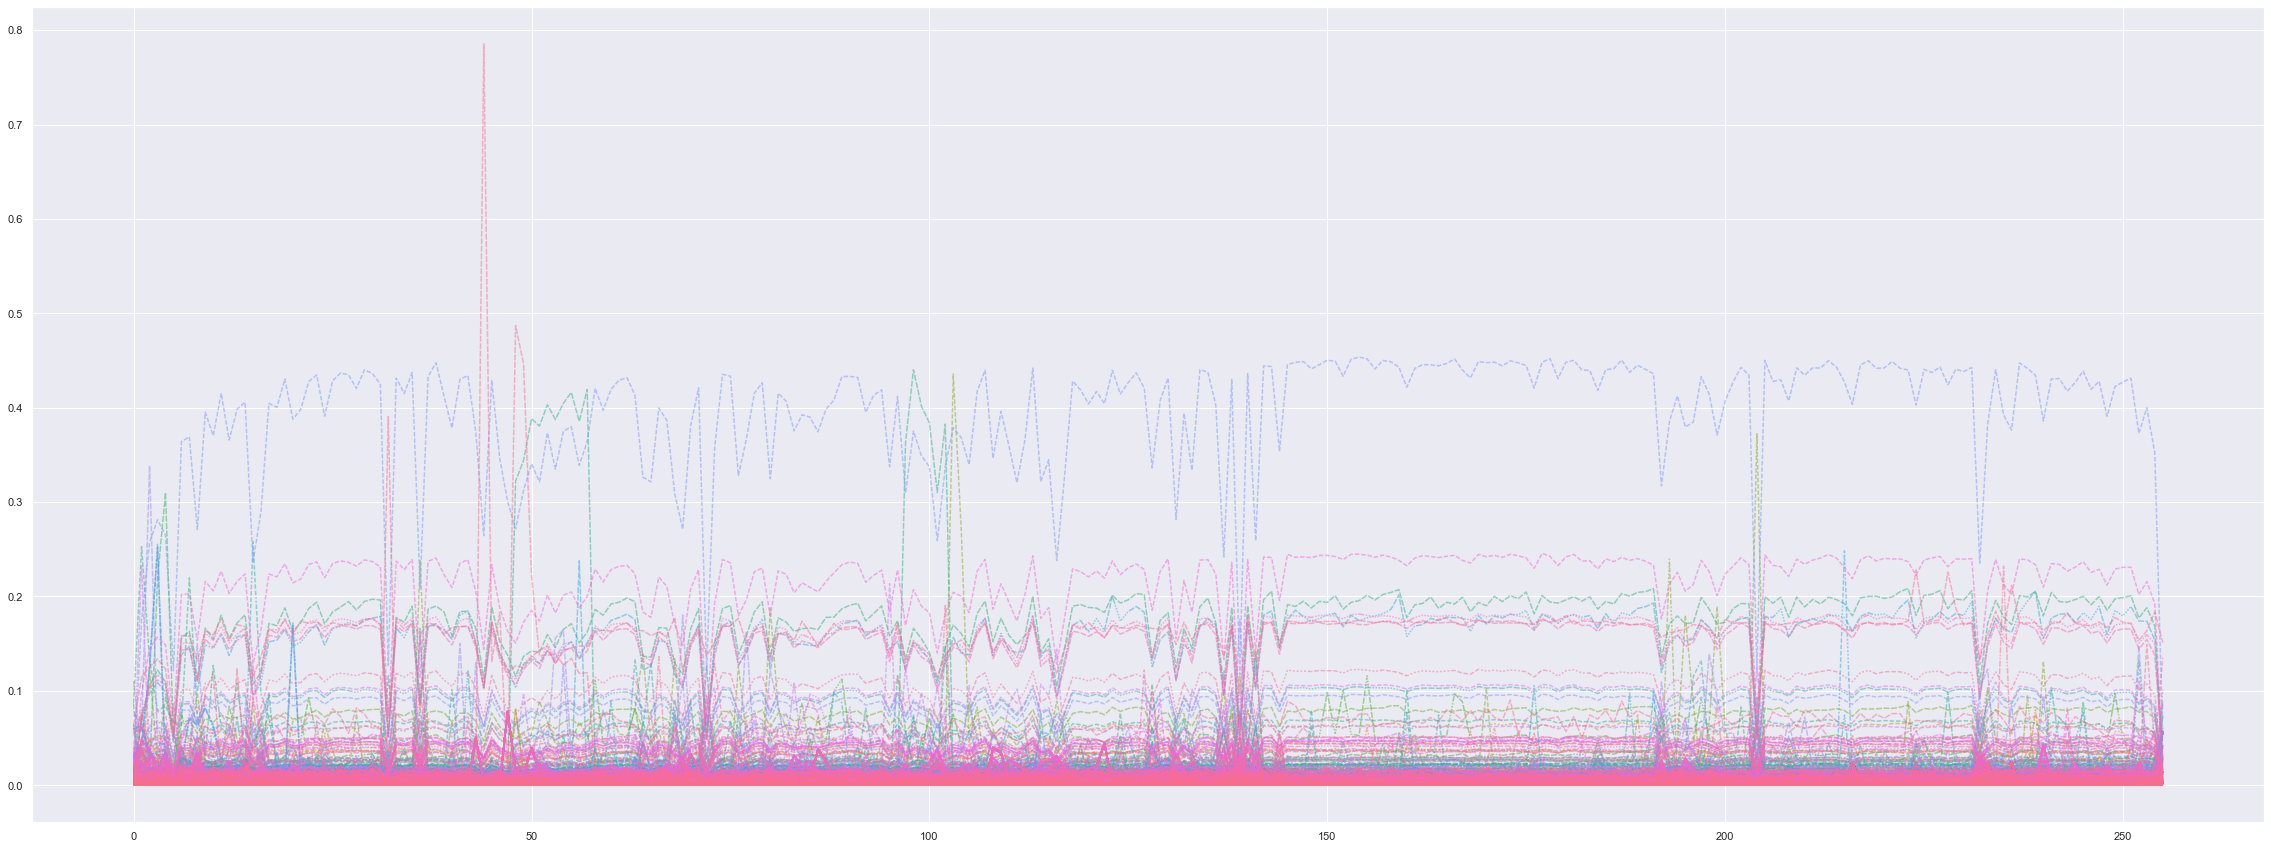

In [48]:
plt.figure(figsize=(40, 15))
sns.set_palette("pastel")
plot=sns.lineplot(data=data_0,alpha=0.5)
plot.get_legend().remove()
plt.show()

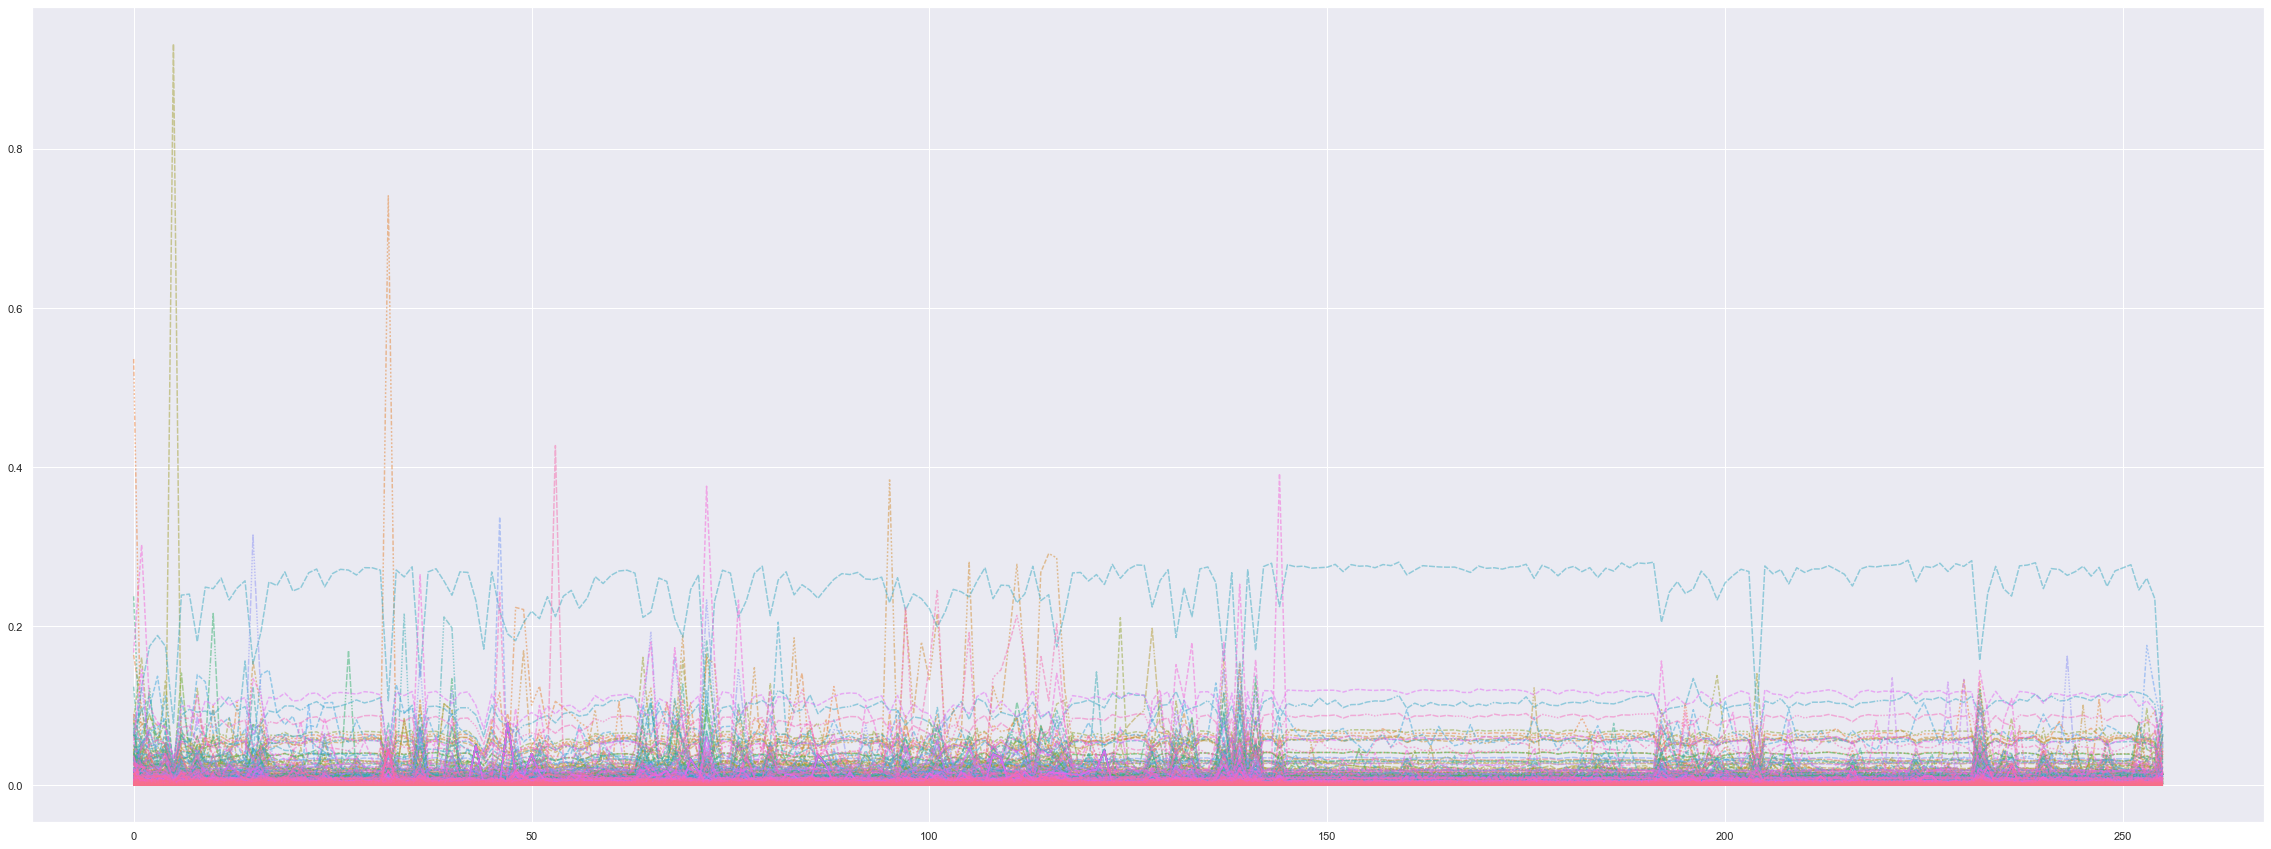

In [49]:
plt.figure(figsize=(40, 15))
plot_1=sns.lineplot(data=data_1,alpha=0.5)
plot_1.get_legend().remove()
plt.show()

In [ ]:
print('ok')

In [4]:
#Fourier transform of histograms
freq_domain=np.fft.fft(data, axis=0)
freq_data_0=data[:,0:2749]
freq_data_1=data[:,2749:4681]

In [5]:
freq_domain.shape

(256, 6000)

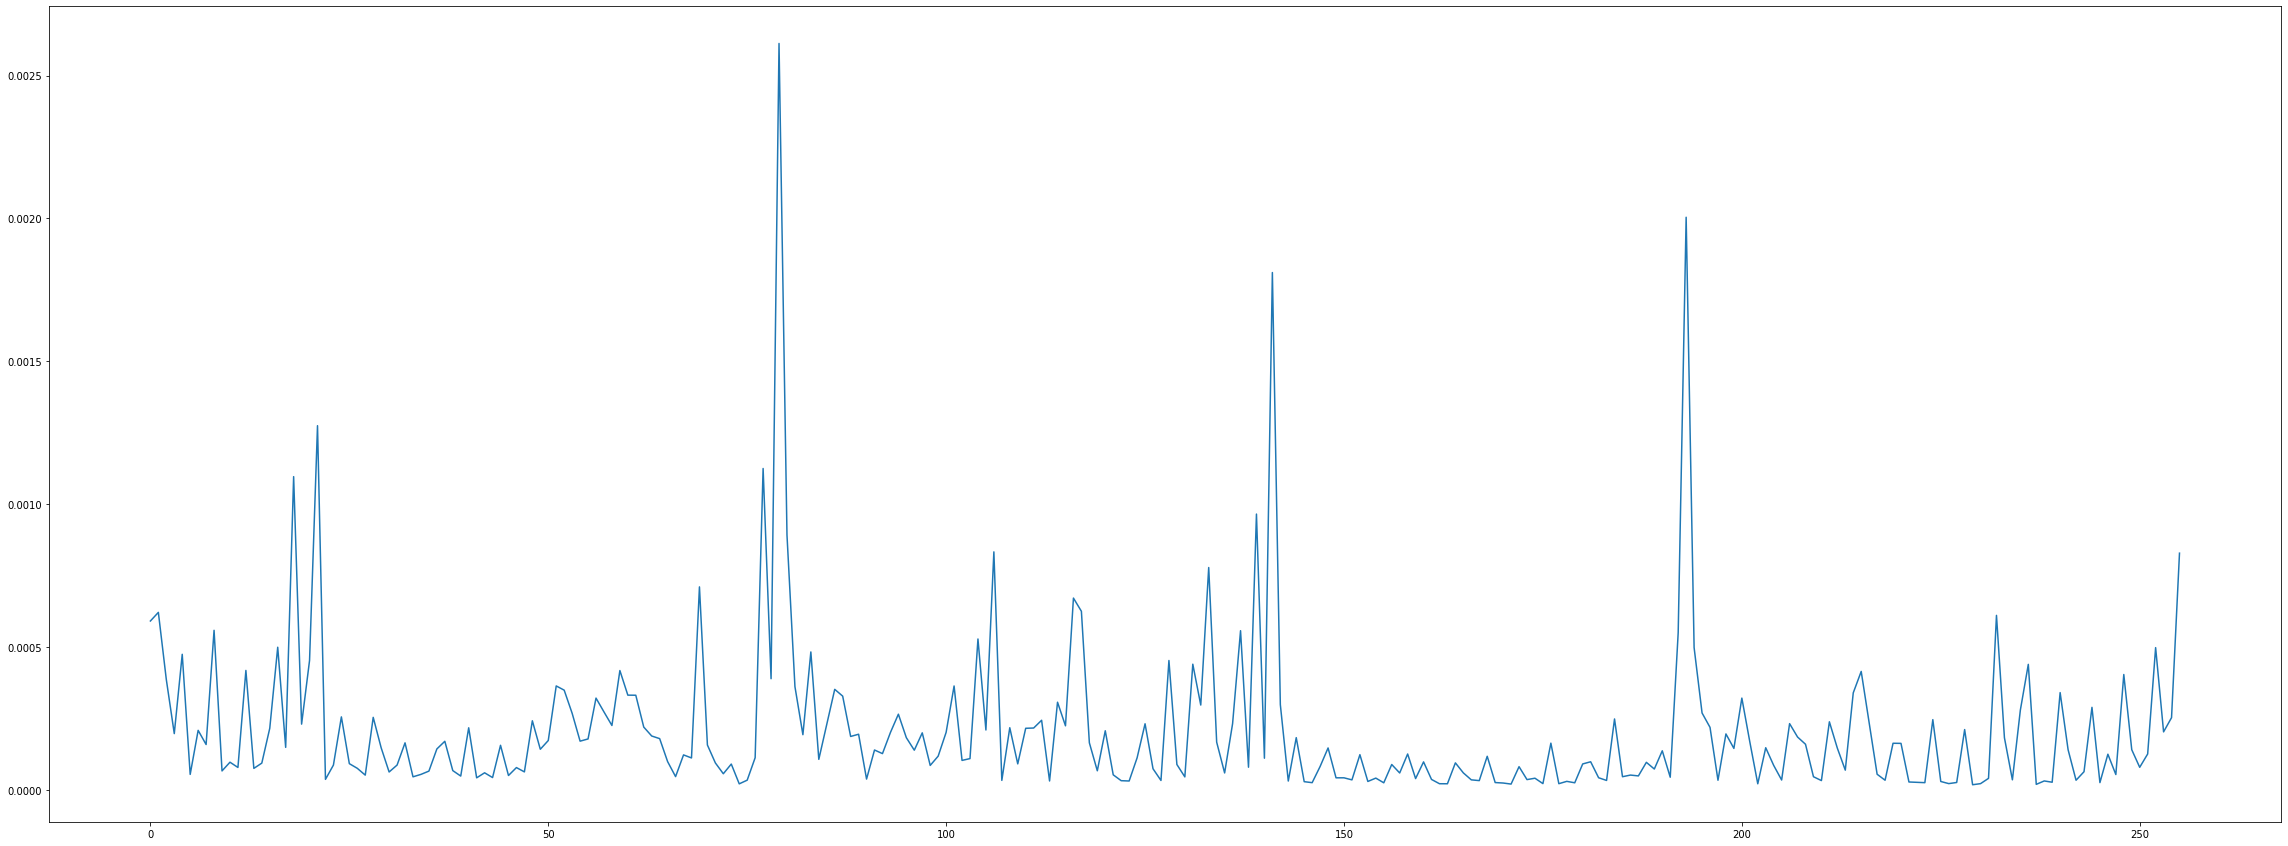

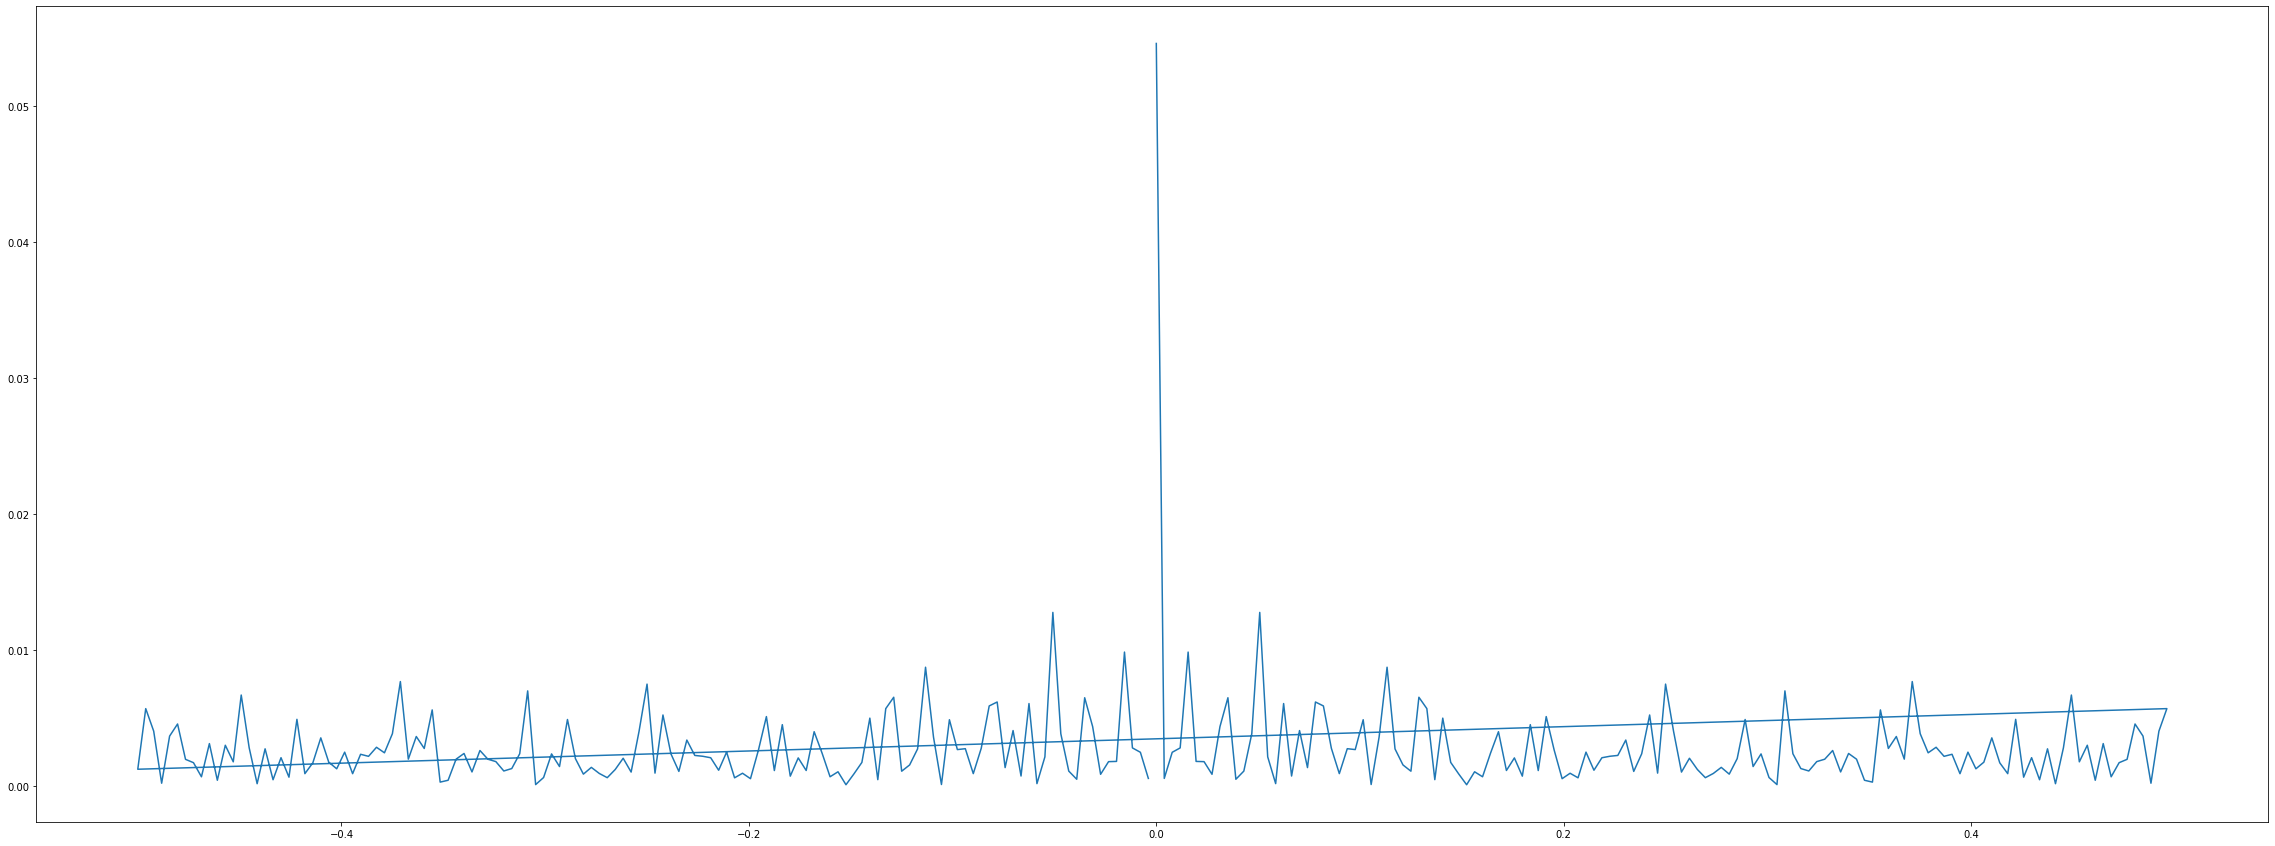

In [6]:
nn=256 #number of samples
one_o=data[:,891] #some test stuff to plot
one_f=np.fft.fft(one_o,n=nn)
plt.figure(figsize=(40, 15))
plot_1=sns.lineplot(data=one_o)
freq = np.fft.fftfreq(nn)
freq_domain=np.stack(freq_domain, axis=1)
data=np.stack(data, axis=1)
plt.show()
plt.figure(figsize=(40, 15))
plt.plot(freq, abs(one_f.real))
plt.show()
#features to describe histograms
mean_amp=[(sum(abs(x.real))/256) for x in freq_domain]
max_amp=[(max(abs(x.real))) for x in freq_domain]
mean_hist=[(sum(x.real/256) ) for x in data]
max_hist=[max(x.real) for x in data]
min_hist=[min(x.real) for x in data]           

In [7]:
df['mean_amp']=mean_amp
df['max_amp']=max_amp
df['mean_hist']=mean_hist
df['max_hist']=max_hist
df['min_hist']=min_hist



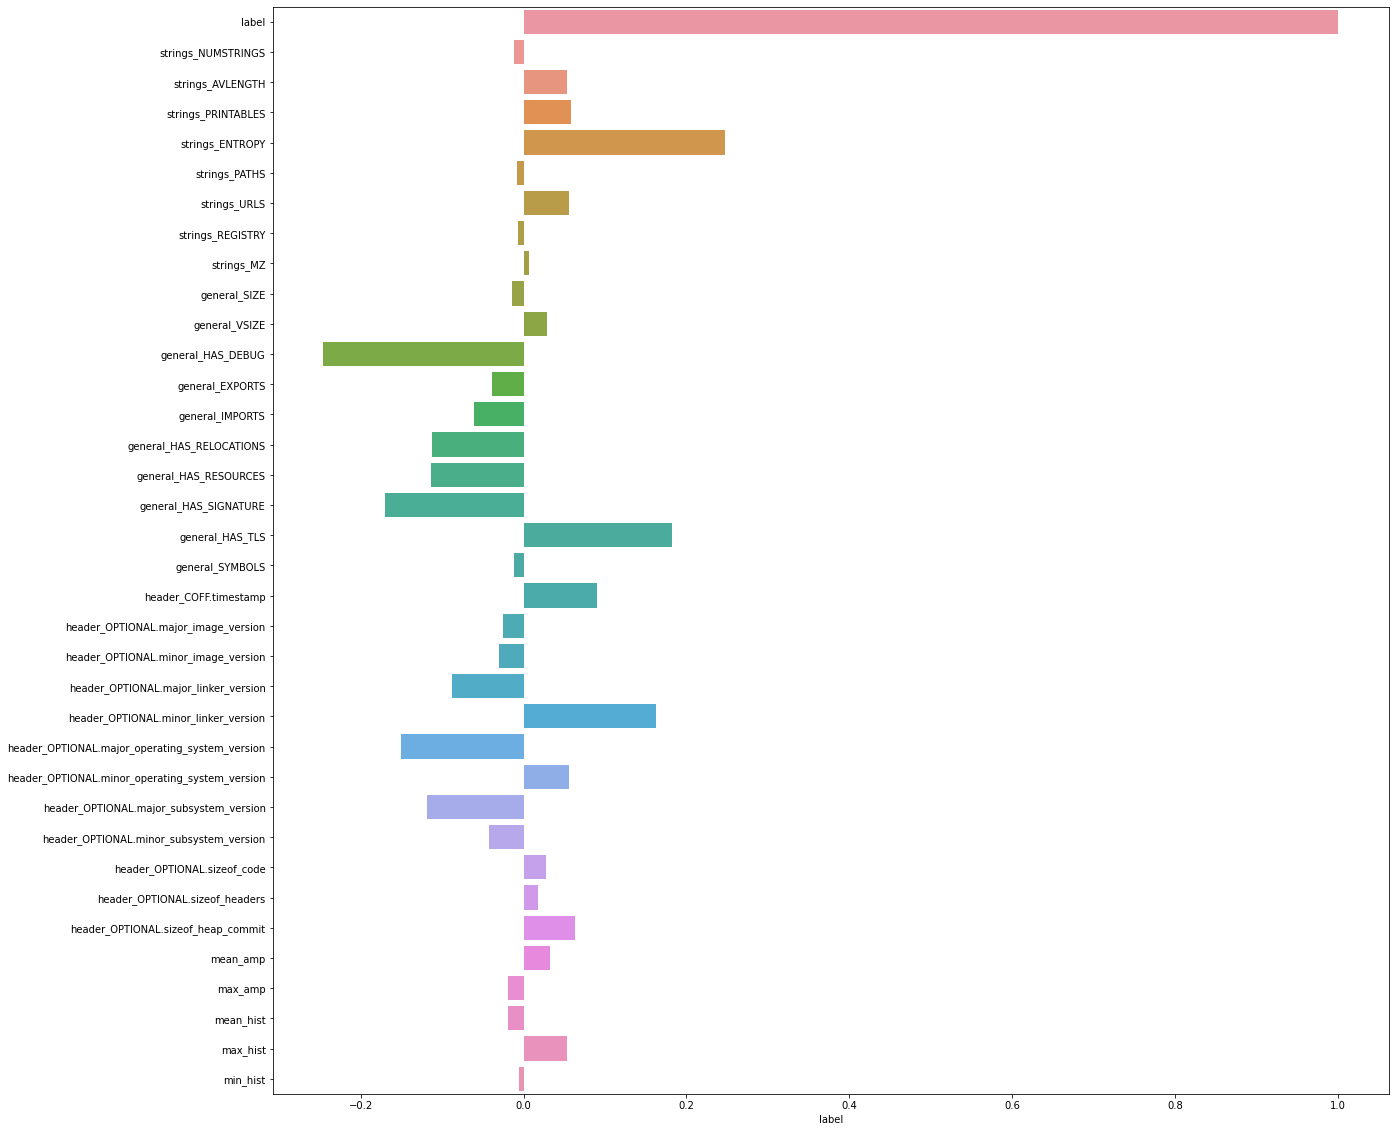

In [8]:
#kick that label -1 out of dataset
unlabeled=df.loc[df['label']==-1].index
df=df.drop(index=unlabeled)
df['label'].unique()

#corelation matrix slice with histogram descriptors
corr_matrix=df.corr()
row=corr_matrix['label']
plt.figure(figsize=(20, 20))
ax = sns.barplot(y=row.index,x=row)
plt.show()

In [9]:
row

label                                             1.000000
strings_NUMSTRINGS                               -0.011446
strings_AVLENGTH                                  0.053862
strings_PRINTABLES                                0.057838
strings_ENTROPY                                   0.247871
strings_PATHS                                    -0.007797
strings_URLS                                      0.055523
strings_REGISTRY                                 -0.006477
strings_MZ                                        0.006616
general_SIZE                                     -0.014541
general_VSIZE                                     0.028381
general_HAS_DEBUG                                -0.245661
general_EXPORTS                                  -0.038289
general_IMPORTS                                  -0.061076
general_HAS_RELOCATIONS                          -0.112295
general_HAS_RESOURCES                            -0.113968
general_HAS_SIGNATURE                            -0.1696